In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [141]:
file_path = '/kaggle/input/final-project-dataset/movie_dataset.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Français""}, {""is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz Léa Seydoux Ralph...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [142]:
numerical_df = df.select_dtypes(include='number')
numerical_df.shape

(4803, 8)

In [143]:
categorical_df = df.select_dtypes(exclude='number')
categorical_df.shape
# categorical_df.info()

(4803, 16)

# چه درصدی از هر ستون مقادیر گم شده دارد؟

In [144]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_data = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})
null_data_sorted = null_data.sort_values(by='Null Percentage', ascending=False)


print(null_data_sorted)

                      Null Count  Null Percentage
homepage                    3091        64.355611
tagline                      844        17.572351
keywords                     412         8.577972
cast                          43         0.895274
director                      30         0.624610
genres                        28         0.582969
overview                       3         0.062461
runtime                        2         0.041641
release_date                   1         0.020820
popularity                     0         0.000000
production_companies           0         0.000000
production_countries           0         0.000000
budget                         0         0.000000
revenue                        0         0.000000
original_title                 0         0.000000
spoken_languages               0         0.000000
status                         0         0.000000
original_language              0         0.000000
title                          0         0.000000


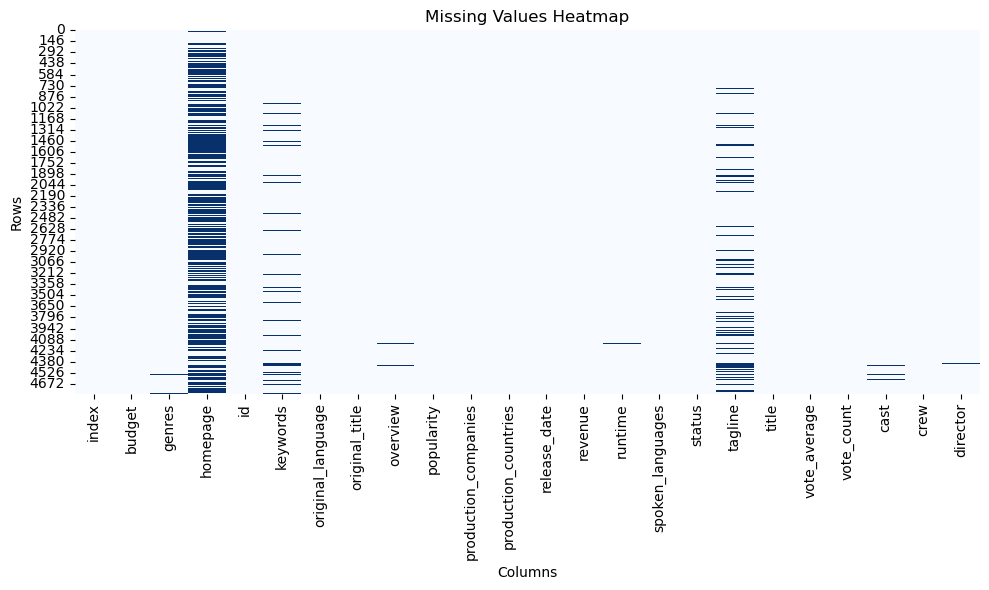

In [145]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

# مقادیر گم شده غیر عددی را با «ناموجود» پر میکنیم

In [146]:
# df['has_homepage'] = df['homepage'].notnull()
df['homepage'].fillna('Not Available', inplace=True)

# df['has_tagline'] = df['tagline'].notnull()
df['tagline'].fillna('Not Available', inplace=True)

# df['has_keywords'] = df['keywords'].notnull()
df['keywords'].fillna('Not Available', inplace=True)

# df['has_cast'] = df['cast'].notnull()
df['cast'].fillna('Not Available', inplace=True)

# df['has_director'] = df['director'].notnull()
df['director'].fillna('Not Available', inplace=True)

# df['has_genre'] = df['genres'].notnull()
df['genres'].fillna('Not Available', inplace=True)

# df['has_overview'] = df['overview'].notnull()
df['overview'].fillna('Not Available', inplace=True)

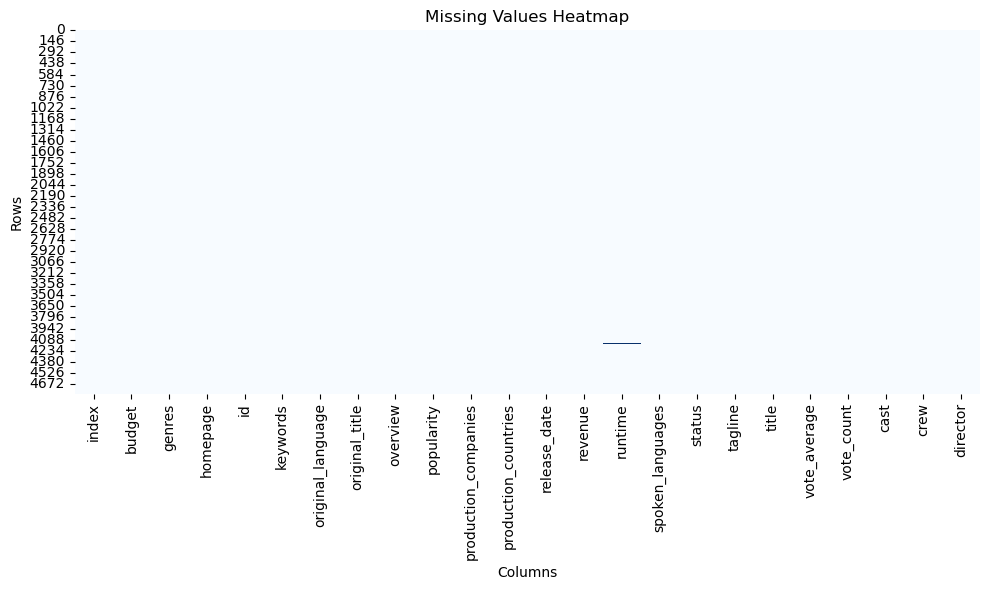

In [147]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

# مقادیر گم شده باقی مانده چون تعداد کمی دارند حذف میکنیم

In [81]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_data = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})
null_data_sorted = null_data.sort_values(by='Null Percentage', ascending=False)


print(null_data_sorted)

                      Null Count  Null Percentage
runtime                        2         0.041641
release_date                   1         0.020820
budget                         0         0.000000
crew                           0         0.000000
cast                           0         0.000000
vote_count                     0         0.000000
vote_average                   0         0.000000
title                          0         0.000000
tagline                        0         0.000000
status                         0         0.000000
spoken_languages               0         0.000000
revenue                        0         0.000000
index                          0         0.000000
production_countries           0         0.000000
production_companies           0         0.000000
popularity                     0         0.000000
overview                       0         0.000000
original_title                 0         0.000000
original_language              0         0.000000


In [82]:
df.dropna(subset=['runtime'], inplace=True)
df.dropna(subset=['release_date'], inplace=True)

# چه تعدادی از مقادیر عددی صفر هستند؟

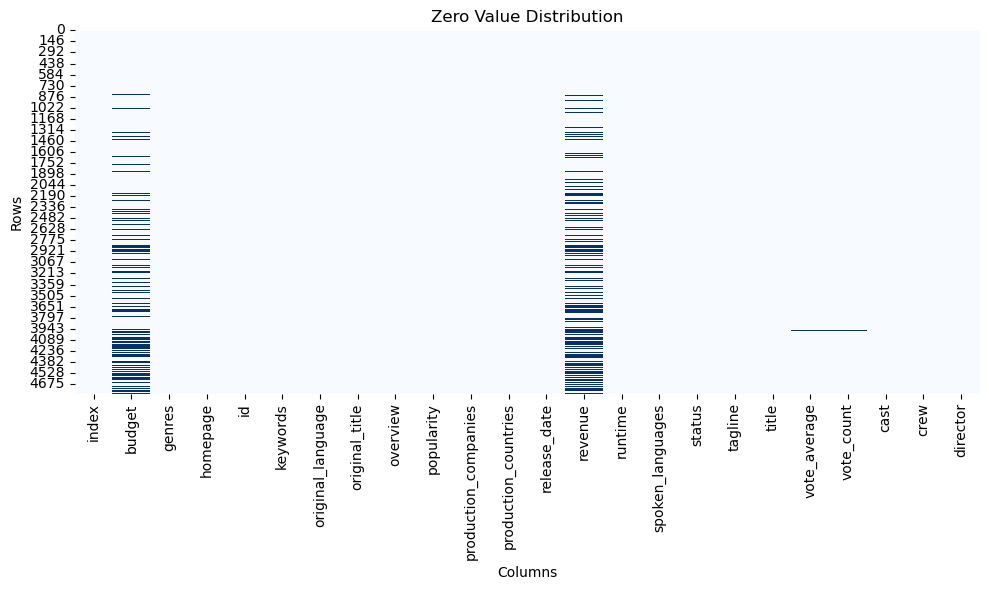

In [83]:
mask_zero = df == 0

plt.figure(figsize=(10, 6))
sns.heatmap(mask_zero, cmap='Blues', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zero Value Distribution')
plt.tight_layout()
plt.show()

# The average cost to make a movie is between 50 million and 100 million dollars. 

# The average movie revenue 129.9 million domestically (i.e. the US and Canada) and 243.3 million internationally (i.e./ everywhere else), leading to a total box office gross of 373.2 million.

# اعداد بودجه و سود اگر زیر ۱۰۰ بودند در یک میلیون ضرب میکنیم. چرا؟ چون با توجه به منابع میانگین هزینه ساخت فیلم بین ۵۰ تا ۱۰۰ میلیون است.

In [84]:
threshold = 100
suspicious_budget = df[(df['budget'] <= threshold) & (df['budget'] != 0)]
suspicious_revenue = df[(numerical_df['revenue'] <= threshold) & (df['revenue'] != 0)]

print(suspicious_budget.shape)
print(suspicious_revenue.shape)
# print(suspicious_budget)
# print(suspicious_revenue)

(23, 24)
(18, 24)
      index  budget                                        genres  \
1562   1562      30             Adventure Animation Comedy Family   
1771   1771      28                  Thriller Action Comedy Crime   
1912   1912      25                                         Drama   
2617   2617      15                                        Comedy   
2933   2933      11                                  Drama Action   
3131   3131      10                          Drama Romance Comedy   
3137   3137      10                               Horror Thriller   
3144   3144      10                     Drama Action Comedy Crime   
3372   3372       7  Thriller Action Horror Science Fiction Crime   
3419   3419       7                  Comedy Drama Foreign Romance   
3611   3611       4                             Drama Romance War   
3687   3687       4                                Comedy Romance   
3967   3967       3                                  Drama Comedy   
4238   4238     

/tmp/ipykernel_33/16896229.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  suspicious_revenue = df[(numerical_df['revenue'] <= threshold) & (df['revenue'] != 0)]


In [85]:
scaling_factor = 1000000
df.loc[suspicious_budget.index, 'budget'] *= scaling_factor
df.loc[suspicious_revenue.index, 'revenue'] *= scaling_factor

# میخواهیم مقادیر صفر ستون های بودجه و سود را پر کنیم. اما با چه مقادیری باید پر کنیم؟

In [86]:
df.loc[df['genres'].str.contains(r'Science', case=False) & df['genres'].str.contains(r'Fiction', case=False), 'genres'] = 'Science_Fiction'
df.loc[df['genres'].str.contains(r'Not', case=False) & df['genres'].str.contains(r'Available', case=False), 'genres'] = 'Not_Available'
df.loc[df['genres'].str.contains(r'TV', case=False) & df['genres'].str.contains(r'Movie', case=False), 'genres'] = 'TV_Movie'


genre
Animation      7.477414e+07
Adventure      7.287652e+07
Fantasy        7.102860e+07
Family         6.326563e+07
Action         5.857338e+07
Fiction        5.854580e+07
Science        5.854580e+07
War            3.831288e+07
Thriller       3.781255e+07
Mystery        3.608473e+07
History        3.548785e+07
Western        3.458521e+07
Comedy         3.324921e+07
Crime          3.257725e+07
Drama          2.740803e+07
Romance        2.653376e+07
Music          2.169608e+07
Horror         1.858457e+07
Documentary    5.211817e+06
Movie          3.066667e+06
TV             3.066667e+06
Foreign        2.796876e+06
Not            9.250002e+05
Available      9.250002e+05
Name: budget, dtype: float64


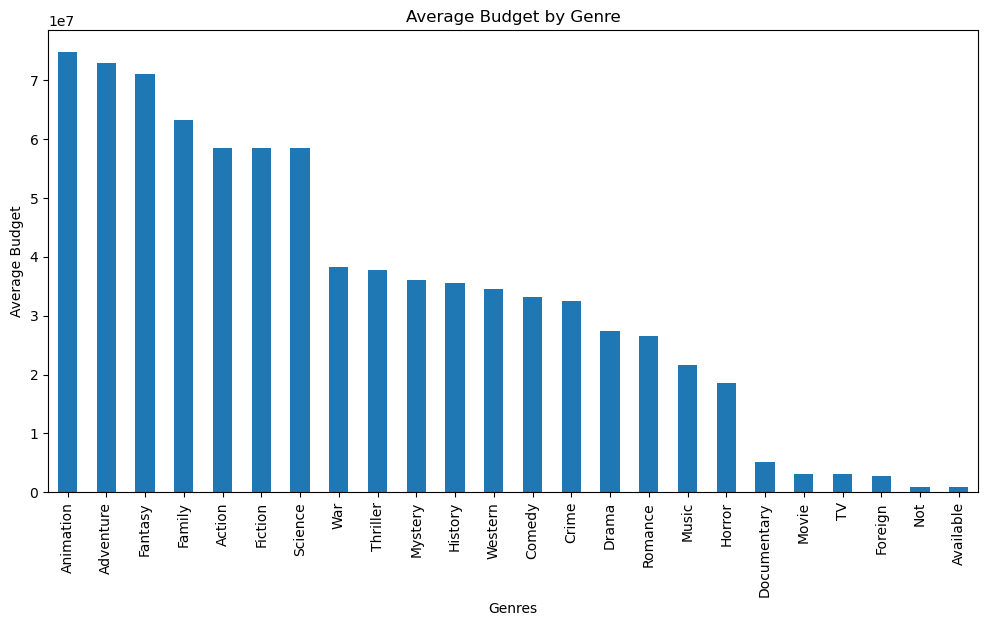

In [149]:
genres_df = df['genres'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
movies_df_split = df.drop(columns='genres').join(genres_df)
average_budget_by_genre = movies_df_split[movies_df_split['budget'] > 0].groupby('genre')['budget'].mean()
average_budget_by_genre = average_budget_by_genre.sort_values(ascending=False)
print(average_budget_by_genre)

plt.figure(figsize=(12, 6))
average_budget_by_genre.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Average Budget')
plt.title('Average Budget by Genre')
plt.xticks(rotation=90)
plt.show()


In [88]:
genre_budget_dict = average_budget_by_genre.to_dict()

def impute_budget(row):
    if row['budget'] == 0:
        genres = row['genres'].split()
        genre_budgets = [genre_budget_dict[genre] for genre in genres if genre in genre_budget_dict]
        if genre_budgets:
            return np.mean(genre_budgets)
    return row['budget']
df['budget'] = df.apply(impute_budget, axis=1)


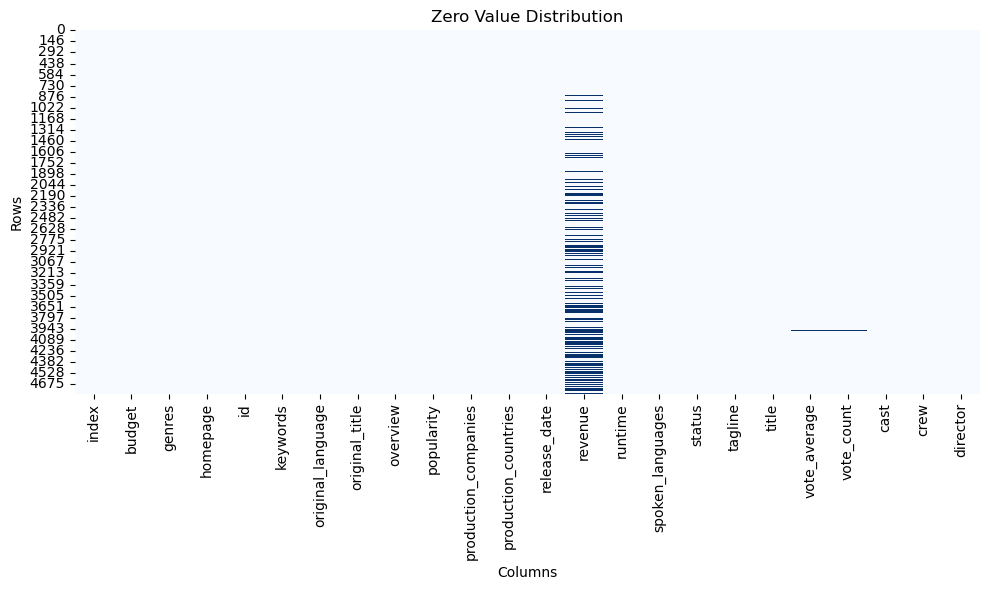

In [89]:
mask_zero = df == 0

plt.figure(figsize=(10, 6))
sns.heatmap(mask_zero, cmap='Blues', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zero Value Distribution')
plt.tight_layout()
plt.show()

# حالا همنیکار را برای ستون سود میکنیم

In [90]:
df.loc[df['genres'].str.contains(r'Science', case=False) & df['genres'].str.contains(r'Fiction', case=False), 'genres'] = 'Science_Fiction'
df.loc[df['genres'].str.contains(r'Not', case=False) & df['genres'].str.contains(r'Available', case=False), 'genres'] = 'Not_Available'
df.loc[df['genres'].str.contains(r'TV', case=False) & df['genres'].str.contains(r'Movie', case=False), 'genres'] = 'TV_Movie'


genre
Animation          2.962343e+08
Fantasy            2.415456e+08
Family             2.279412e+08
Adventure          2.202697e+08
Science_Fiction    1.873353e+08
Action             1.465938e+08
Comedy             1.043144e+08
War                1.019421e+08
Thriller           9.801000e+07
Mystery            9.658639e+07
Romance            8.923774e+07
Crime              8.447878e+07
Drama              7.587296e+07
History            7.564761e+07
Music              7.481531e+07
Horror             6.495585e+07
Western            6.125488e+07
Documentary        2.355910e+07
Foreign            3.233024e+06
Not_Available      1.672730e+06
Name: revenue, dtype: float64


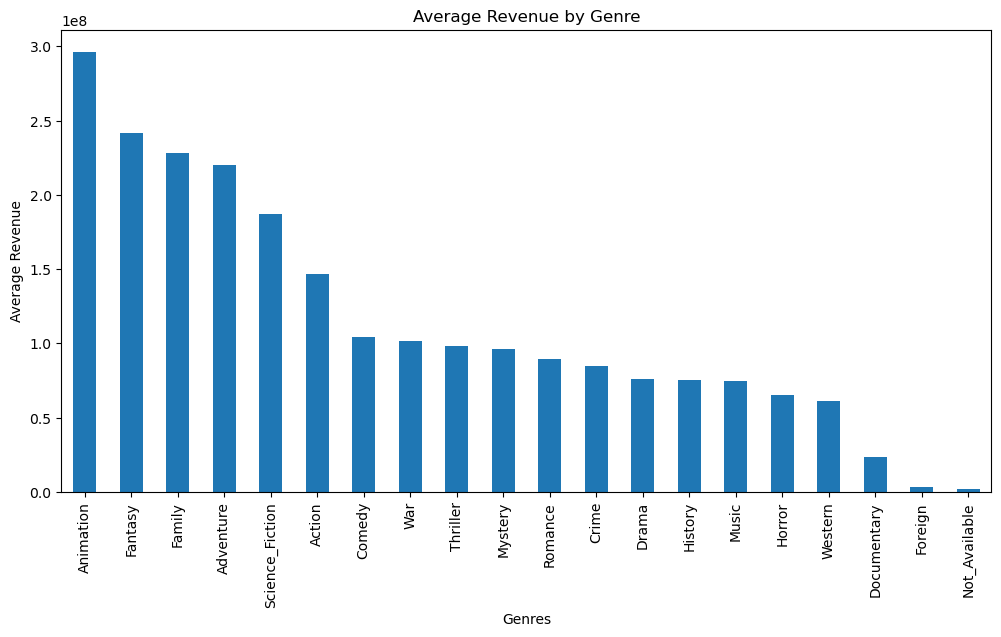

In [91]:
genres_df = df['genres'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
movies_df_split = df.drop(columns='genres').join(genres_df)
average_revenue_by_genre = movies_df_split[movies_df_split['revenue'] > 0].groupby('genre')['revenue'].mean()
average_revenue_by_genre = average_revenue_by_genre.sort_values(ascending=False)
print(average_revenue_by_genre)

plt.figure(figsize=(12, 6))
average_revenue_by_genre.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Genre')
plt.xticks(rotation=90)
plt.show()


In [92]:
genre_revenue_dict = average_revenue_by_genre.to_dict()

def impute_revenue(row):
    if row['revenue'] == 0:
        genres = row['genres'].split()
        genre_revenues = [genre_revenue_dict[genre] for genre in genres if genre in genre_revenue_dict]
        if genre_revenues:
            return np.mean(genre_revenues)
    return row['revenue']
df['revenue'] = df.apply(impute_revenue, axis=1)


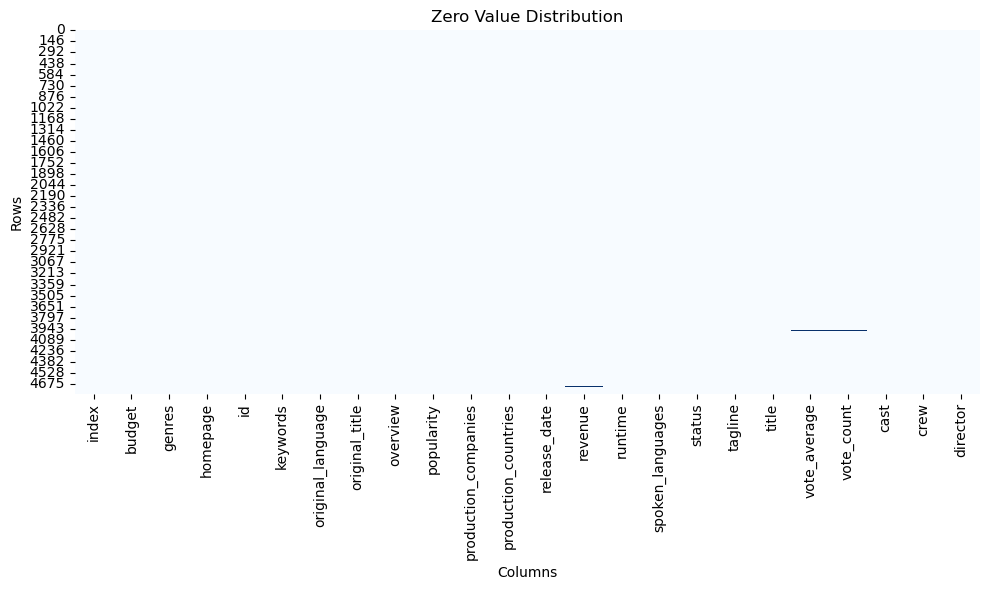

In [93]:
mask_zero = df == 0

plt.figure(figsize=(10, 6))
sns.heatmap(mask_zero, cmap='Blues', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zero Value Distribution')
plt.tight_layout()
plt.show()

In [94]:
zero_counts = (df == 0).sum()
zero_percentages = (zero_counts / len(df)) * 100
zero_data = pd.DataFrame({
    'Zero Count': zero_counts,
    'Zero Percentage': zero_percentages
})
zero_data_sorted = zero_data.sort_values(by='Zero Percentage', ascending=False)

print(zero_data_sorted)

                      Zero Count  Zero Percentage
vote_average                  61         1.270833
vote_count                    60         1.250000
runtime                       34         0.708333
revenue                        8         0.166667
index                          1         0.020833
budget                         0         0.000000
crew                           0         0.000000
cast                           0         0.000000
title                          0         0.000000
tagline                        0         0.000000
status                         0         0.000000
spoken_languages               0         0.000000
release_date                   0         0.000000
production_countries           0         0.000000
production_companies           0         0.000000
popularity                     0         0.000000
overview                       0         0.000000
original_title                 0         0.000000
original_language              0         0.000000


In [95]:
df.drop(df[(df['vote_average'] == 0) | (df['runtime'] == 0) | (df['revenue'] == 0)].index, inplace = True)


# چک کنیم آيا مقادیر همه در بازه ی قابل قبول هستند؟

In [96]:
range_conditions = {
    'budget': (df['budget'] > 0),
    'revenue': (df['revenue'] > 0),
    'vote_count': (df['vote_count'] > 0),
    'vote_average': (df['vote_average'] > 0) & (df['vote_average'] <= 10),
    'popularity': (df['popularity'] >= 0),
    'runtime': (df['runtime'] > 0),
    'id': (df['id'] >= 0)
}

In [97]:
rows_not_in_range = df[~pd.DataFrame(range_conditions).all(axis=1)]
print(rows_not_in_range.shape[0])

0


# حالا میخواهیم داده های پرت را حذف کنیم

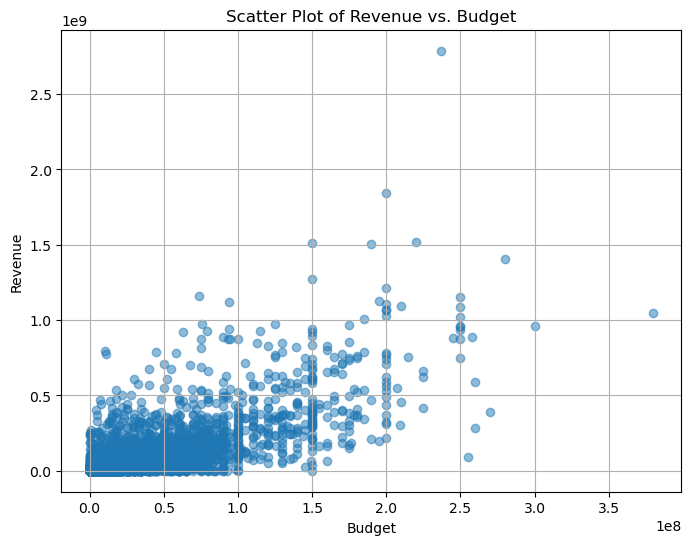

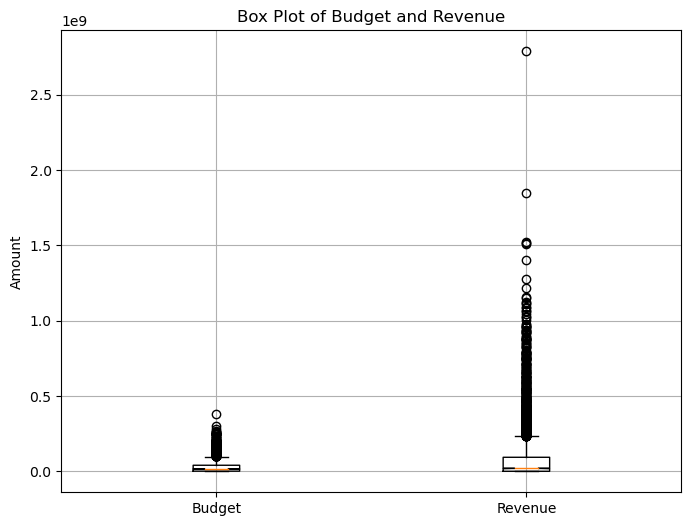

Correlation coefficient: 0.730822856924462


In [150]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Scatter Plot of Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Box plot of budget and revenue
plt.figure(figsize=(8, 6))
plt.boxplot([df['budget'], df['revenue']], labels=['Budget', 'Revenue'],notch=True)
plt.title('Box Plot of Budget and Revenue')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between budget and revenue
correlation = df['budget'].corr(df['revenue'])
print("Correlation coefficient:", correlation)

In [98]:
z_scores_budget = np.abs((df['budget'] - df['budget'].mean()) / df['budget'].std())
z_scores_revenue = np.abs((df['revenue'] - df['revenue'].mean()) / df['revenue'].std())

z_score_threshold = 3

df = df[(z_scores_budget <= z_score_threshold) & (z_scores_revenue <= z_score_threshold)]

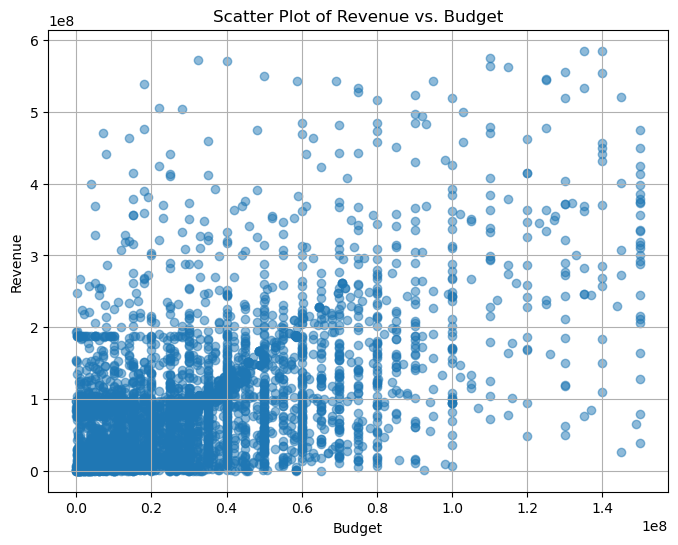

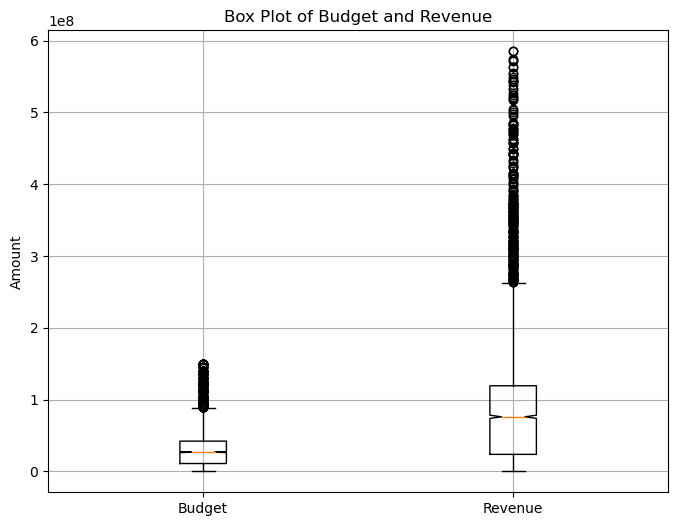

Correlation coefficient: 0.5668823219548239


In [104]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Scatter Plot of Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Box plot of budget and revenue
plt.figure(figsize=(8, 6))
plt.boxplot([df['budget'], df['revenue']], labels=['Budget', 'Revenue'], notch=True)
plt.title('Box Plot of Budget and Revenue')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between budget and revenue
correlation = df['budget'].corr(df['revenue'])
print("Correlation coefficient:", correlation)

# کشیدن پلات توزیع مقادیر عددی

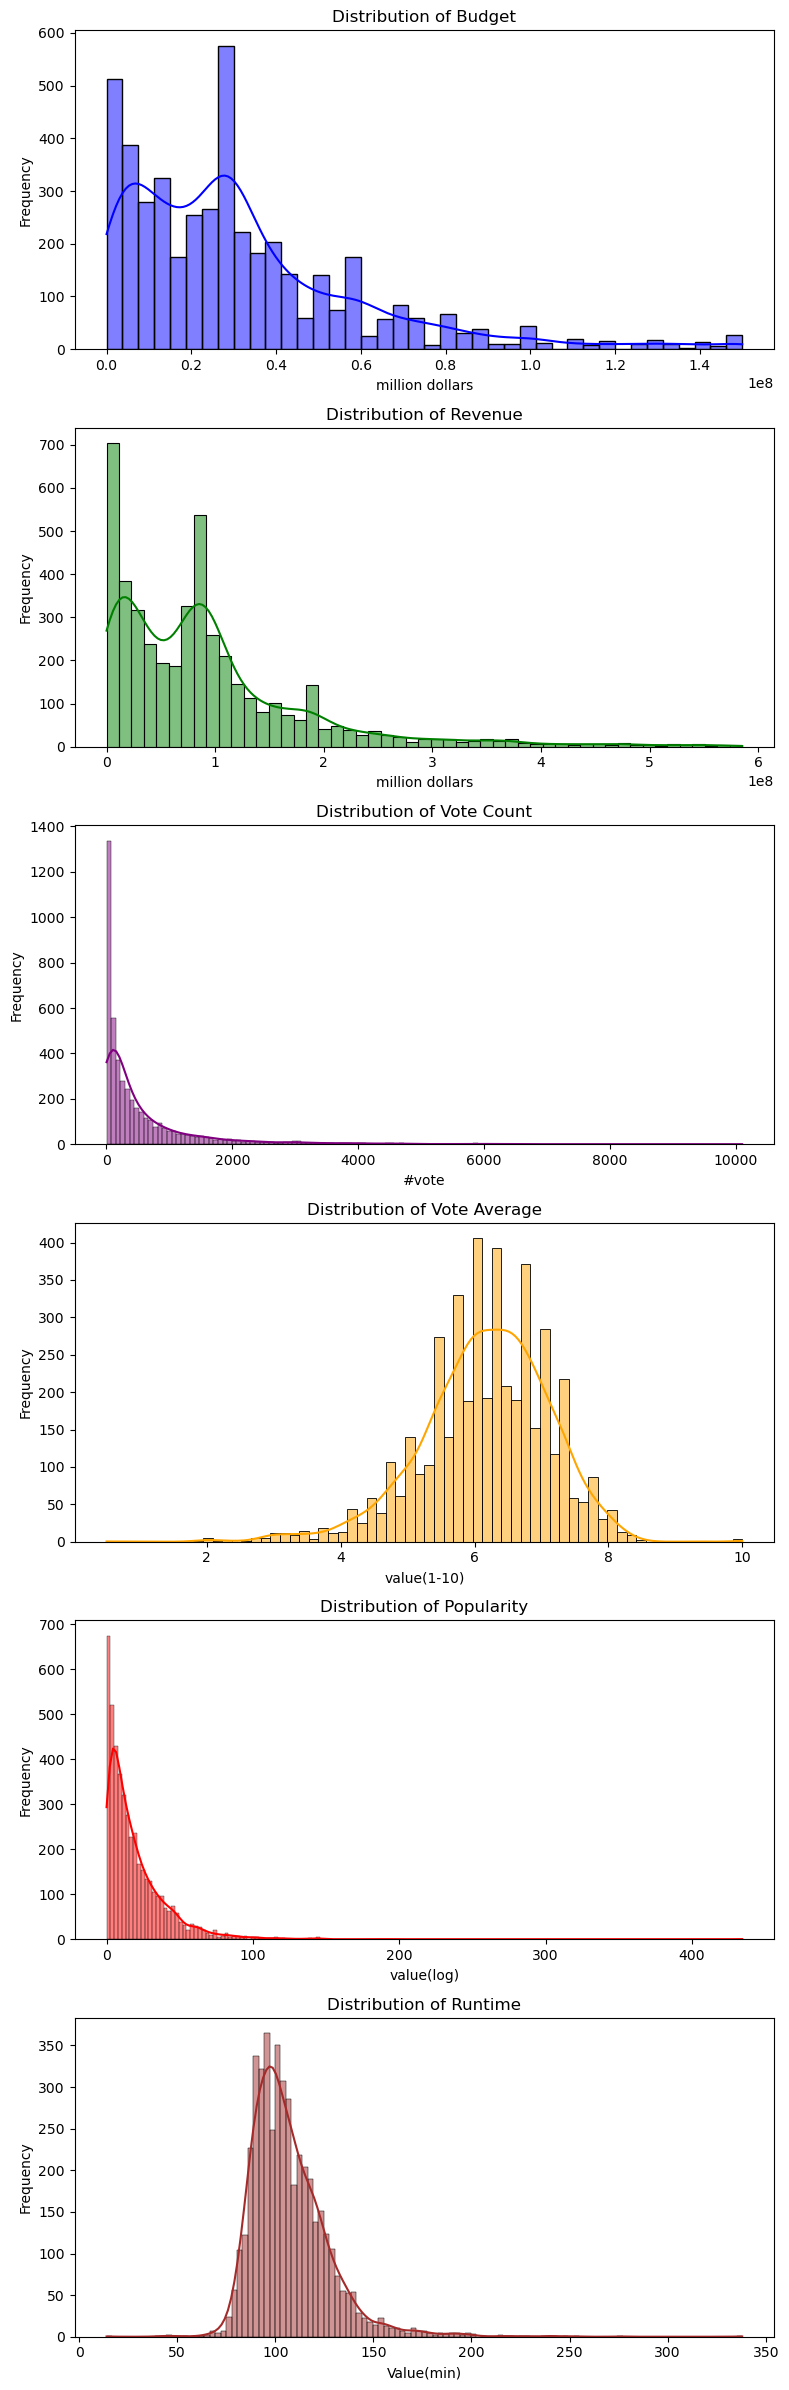

In [106]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 24))
sns.histplot(df['budget'], kde=True, ax=axes[0], color='blue')
sns.histplot(df['revenue'], kde=True, ax=axes[1], color='green')
sns.histplot(df['vote_count'], kde=True, ax=axes[2], color='purple')
sns.histplot(df['vote_average'], kde=True, ax=axes[3], color='orange')
sns.histplot(df['popularity'], kde=True, ax=axes[4], color='red')
sns.histplot(df['runtime'], kde=True, ax=axes[5], color='brown')

axes[0].set_title('Distribution of Budget')
axes[1].set_title('Distribution of Revenue')
axes[2].set_title('Distribution of Vote Count')
axes[3].set_title('Distribution of Vote Average')
axes[4].set_title('Distribution of Popularity')
axes[5].set_title('Distribution of Runtime')
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

axes[0].set_xlabel('million dollars')
axes[1].set_xlabel('million dollars')
axes[2].set_xlabel('#vote')
axes[3].set_xlabel('value(1-10)')
axes[4].set_xlabel('value(log)')
axes[5].set_xlabel('Value(min)')

# axes[0].set_ylabel('Value')
# axes[1].set_ylabel('Value')
# axes[2].set_ylabel('Value')
# axes[3].set_ylabel('Value')
# axes[4].set_ylabel('Value')
# axes[5].set_ylabel('Value')

plt.tight_layout()
plt.show()


# سوالات

# In which genres are films generally made?

In [107]:
genres_copy = df['genres'].copy()
genres_copy = genres_copy.str.split()

all_genres = []

for genres_list in genres_copy:
    all_genres.extend(genres_list)
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)

Drama              2142
Comedy             1575
Thriller           1031
Romance             847
Action              829
Crime               665
Adventure           512
Science_Fiction     469
Horror              410
Family              403
Mystery             293
Fantasy             290
History             195
Music               177
Animation           171
War                 137
Documentary         101
Western              75
Foreign              34
Not_Available         9
dtype: int64


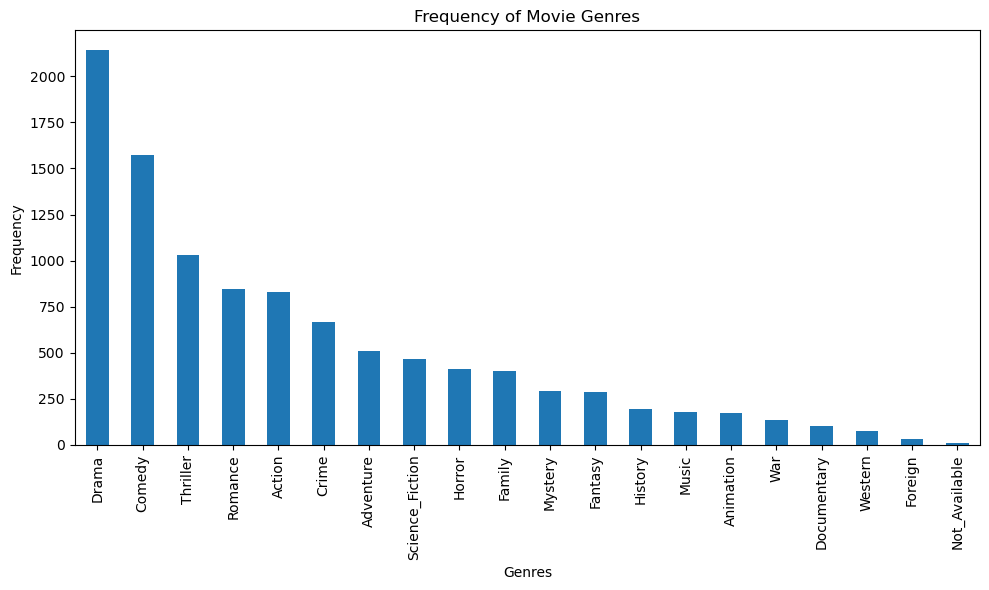

In [108]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

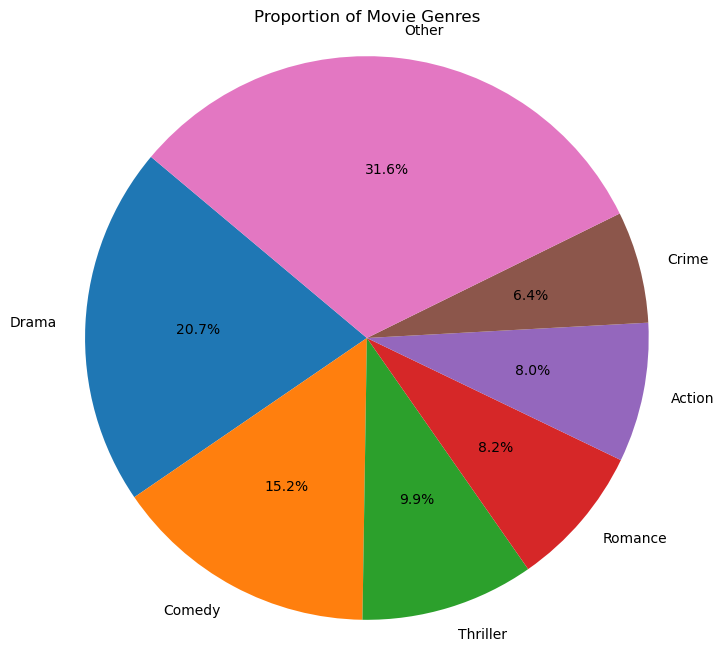

In [109]:
genre_percentages = genre_counts / len(all_genres) * 100

threshold = 5
other_genres_count = genre_counts[genre_percentages < threshold].sum()
genre_counts = genre_counts[genre_percentages >= threshold]
genre_counts['Other'] = other_genres_count

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Proportion of Movie Genres')
plt.show()

# What does the success of the film mean? Ratings or sales or...?

# سود خالص می تواند معیاری از موفقیت باشد.

In [110]:
df['profit'] = df['revenue'] - df['budget']

# Generally, how long are the movies? Does being long or short affect its success?

# رابظه بین زمان فیلم و سود خالص

In [111]:
average_duration = df['runtime'].mean()

median_duration = df['runtime'].median()

print("Average movie duration:", average_duration, "minutes")
print("Median movie duration:", median_duration, "minutes")

Average movie duration: 107.16457645764577 minutes
Median movie duration: 103.0 minutes


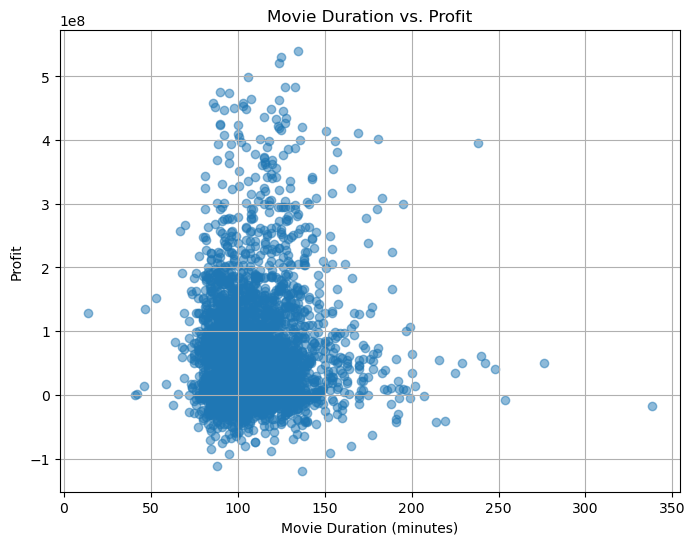

Correlation coefficient: 0.05387445118037288


In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(df['runtime'], df['profit'], alpha=0.5)
plt.title('Movie Duration vs. Profit')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

correlation = df['runtime'].corr(df['profit'])
print("Correlation coefficient:", correlation)

# رابطه بین میانگین رای و مدت زمان فیلم

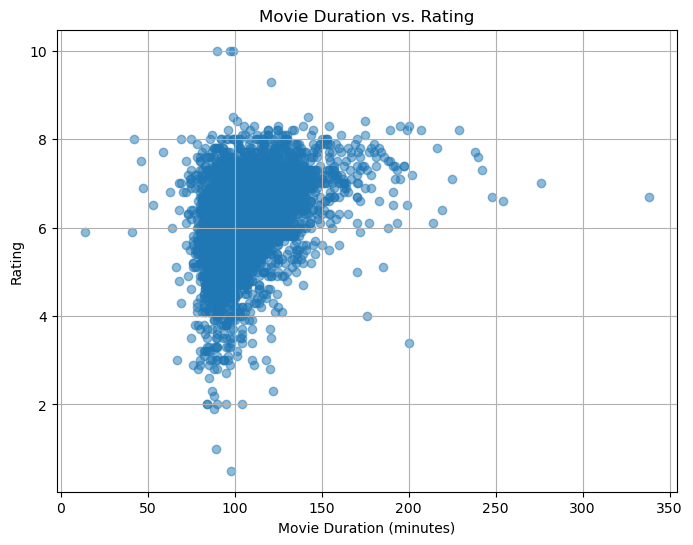

Correlation coefficient: 0.3619702034247494


In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.5)
plt.title('Movie Duration vs. Rating')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

correlation = df['runtime'].corr(df['vote_average'])
print("Correlation coefficient:", correlation)

# Is the rating of a movie the basis of people's choice?

# آیا ستون محبوبیت معیار درستی از محبوبیت را تعیین میکند؟ انتظار داریم در رای گیری فیلم های محبوب افراد زیادی شرکت کرده باشند.

یک داده ای که مقدار محبوبت با اختلاف زیادی از بقیه دارد چون تعداد رای بالایی هم دارد داده پرت در نظر گرفته نمیشود. 

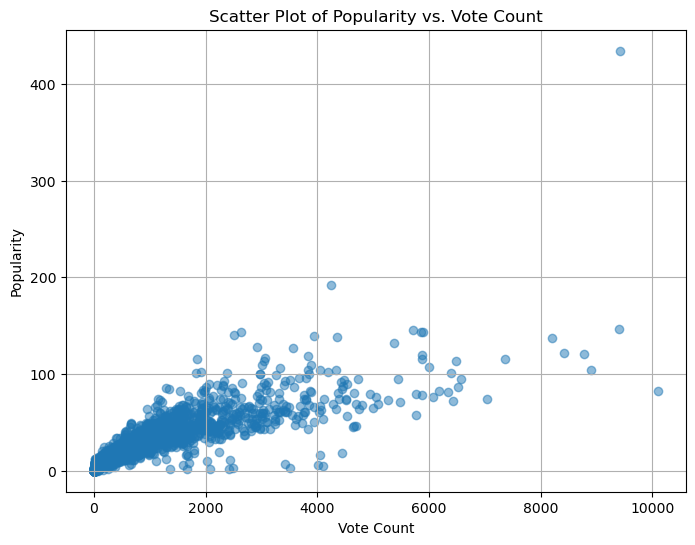

Correlation coefficient: 0.8551459914385053


In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(df['vote_count'], df['popularity'], alpha=0.5)
plt.title('Scatter Plot of Popularity vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

correlation = df['vote_count'].corr(df['popularity'])
print("Correlation coefficient:", correlation)

# In which languages are movies more popular and have more audiance?

In [115]:
unique_languages = df['original_language'].unique()
print(unique_languages)

['en' 'ja' 'fr' 'zh' 'es' 'hi' 'ru' 'ko' 'te' 'de' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [197]:
language_popularity = df.groupby('original_language')['popularity'].mean().reset_index()

language_popularity = language_popularity.sort_values(by='popularity', ascending=False)

print("Top 5 Languages by Average Popularity:")
print(language_popularity.head())

Top 5 Languages by Average Popularity:
   original_language  popularity
6                 el   28.858238
17                ja   25.663788
14                id   24.586253
7                 en   19.662216
18                ko   19.488720


# Which companies have more sales, popularity and the number of films made? Which countries have more sales, popularity and number of movies made?

# شرکت های با بیشترین سود 

In [116]:
import json

In [117]:
def extract_company_names(json_str):
    try:
        data = json.loads(json_str)
        return [item['name'] for item in data]
    except json.JSONDecodeError:
        return []
df['production_companies_names'] = df['production_companies'].apply(extract_company_names)


In [118]:
df_exploded = df.explode('production_companies_names')
company_profit = df_exploded.groupby('production_companies_names')['profit'].sum()
company_profit_sorted = company_profit.sort_values(ascending=False)
print(company_profit_sorted.head())

production_companies_names
Universal Pictures                        2.418720e+10
Warner Bros.                              2.194336e+10
Twentieth Century Fox Film Corporation    2.111849e+10
Paramount Pictures                        2.041408e+10
Columbia Pictures                         1.400367e+10
Name: profit, dtype: float64


# شرکت های بابیشترین محبوبت

In [119]:
company_popularity = df_exploded.groupby('production_companies_names')['popularity'].mean()
company_popularity_sorted = company_popularity.sort_values(ascending=False)
print(company_popularity_sorted.head())

production_companies_names
Linson Films           146.757391
Knickerbocker Films    146.757391
Atman Entertainment    146.757391
Bristol Automotive     145.364591
Alfran Productions     143.659698
Name: popularity, dtype: float64


In [156]:
# Explode the lists in 'production_companies_names' column
df_exploded = df_exploded.explode('production_companies_names')

# Group by production companies and calculate mean popularity and sum of vote counts
company_stats = df_exploded.groupby('production_companies_names').agg({
    'popularity': 'mean',
    'vote_count': 'sum'
})

# Sort the DataFrame by mean popularity in descending order
company_stats_sorted = company_stats.sort_values(by='vote_count', ascending=False)

# Print the top records with mean popularity and vote count
print(company_stats_sorted.head(5))

                                        popularity  vote_count
production_companies_names                                    
Warner Bros.                             32.036860      436922
Universal Pictures                       28.028239      405186
Twentieth Century Fox Film Corporation   30.961521      298098
Paramount Pictures                       24.730231      255541
Columbia Pictures                        30.800347      218674


# شرکت های با بیشترین تعداد فیلم ساخته شده

In [120]:
company_film_counts = df_exploded['production_companies_names'].value_counts()
print(company_film_counts.head())

Universal Pictures                        296
Warner Bros.                              291
Paramount Pictures                        267
Twentieth Century Fox Film Corporation    209
Columbia Pictures                         188
Name: production_companies_names, dtype: int64


# کشورهای با بیشترین سود 

In [121]:
def extract_country_names(json_str):
    try:
        data = json.loads(json_str)
        return [item['name'] for item in data]
    except json.JSONDecodeError:
        return []

In [124]:
df['production_countries_names'] = df['production_countries'].apply(extract_country_names)
df_exploded = df.explode('production_countries_names')
country_profit = df_exploded.groupby('production_countries_names')['profit'].sum()
country_profit_sorted = country_profit.sort_values(ascending=False)
print(country_profit_sorted.head())

production_countries_names
United States of America    2.362311e+11
United Kingdom              3.488672e+10
Germany                     1.713957e+10
France                      1.491342e+10
Canada                      1.478090e+10
Name: profit, dtype: float64


#  کشور های با بیشترین محبوبت

In [125]:
country_popularity = df_exploded.groupby('production_countries_names')['popularity'].mean()

country_popularity_sorted = country_popularity.sort_values(ascending=False)

print(country_popularity_sorted.head())

production_countries_names
Philippines    54.814890
Jamaica        48.901542
Malta          42.526529
Singapore      41.826465
Indonesia      40.285095
Name: popularity, dtype: float64


In [159]:
# Explode the lists in 'production_companies_names' column
df_exploded = df_exploded.explode('production_countries_names')

# Group by production companies and calculate mean popularity and sum of vote counts
company_stats = df_exploded.groupby('production_countries_names').agg({
    'popularity': 'mean',
    'vote_count': 'sum'
})

# Sort the DataFrame by mean popularity in descending order
company_stats_sorted = company_stats.sort_values(by='vote_count', ascending=False)

# Print the top records with mean popularity and vote count
print(company_stats_sorted.head(5))

                            popularity  vote_count
production_countries_names                        
United States of America     24.858996     8467167
United Kingdom               23.186587     1720271
Germany                      24.019298     1158598
France                       20.534725      902900
Canada                       21.699547      599805


# کشور های با بیشترین تعداد فیلم ساخته شده

In [206]:
country_movie_counts = df_exploded['production_countries_names'].value_counts()

print(country_movie_counts.head())

United States of America    3754
United Kingdom               601
Germany                      316
France                       302
Canada                       254
Name: production_countries_names, dtype: int64


# In which years have sales been higher? What is the cause?

In [129]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
yearly_revenue = df.groupby('release_year')['revenue'].sum()
yearly_revenue_sorted = yearly_revenue.sort_values(ascending=False)
print(yearly_revenue_sorted.head())

release_year
2014    2.259834e+10
2009    2.038240e+10
2015    2.009584e+10
2011    1.952282e+10
2013    1.950566e+10
Name: revenue, dtype: float64


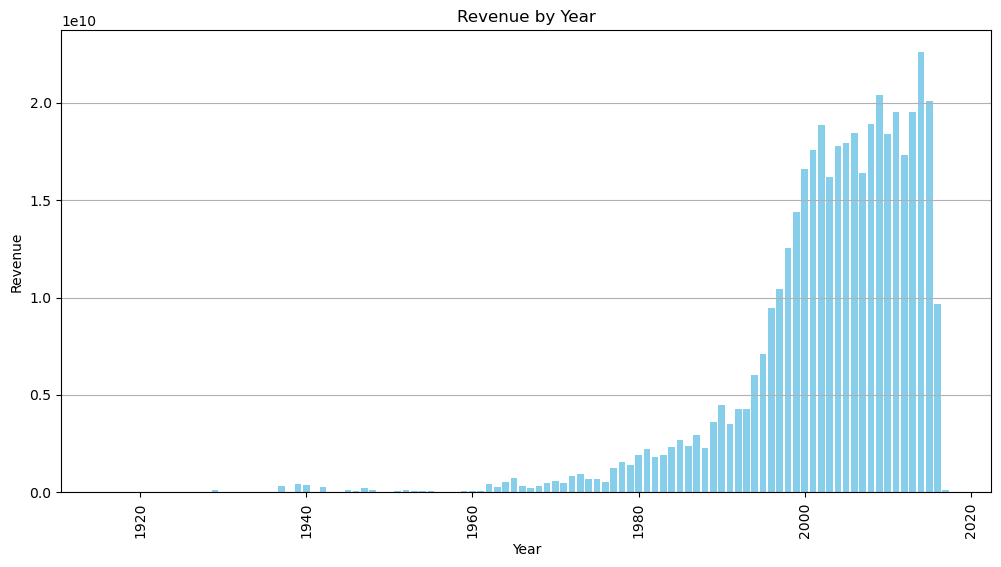

In [130]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_revenue.index, yearly_revenue.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

2009    234
2006    225
2008    217
2011    210
2005    209
Name: release_year, dtype: int64


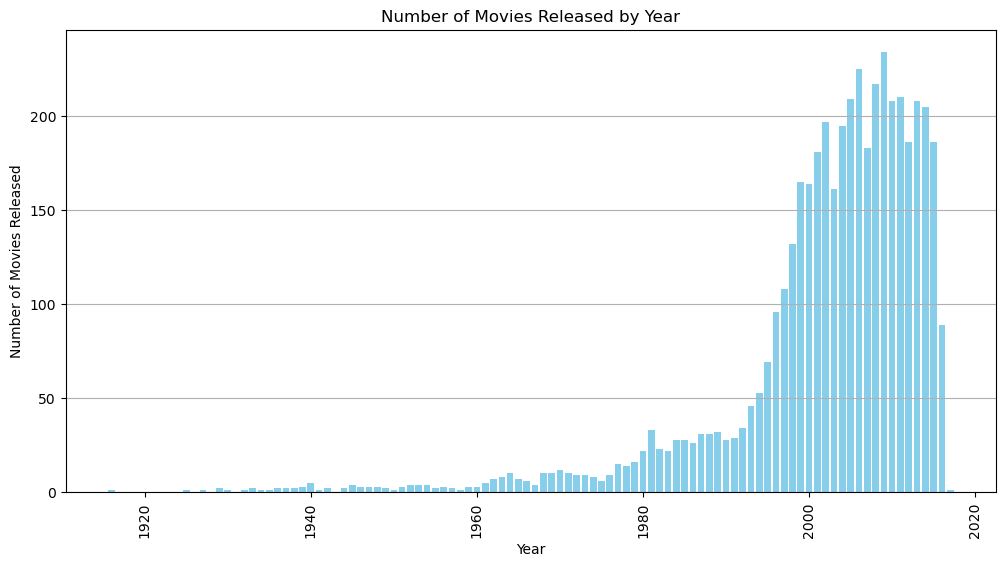

In [131]:
movies_per_year = df['release_year'].value_counts().sort_index()

movies_per_year_sorted = movies_per_year.sort_values(ascending=False)
print(movies_per_year_sorted.head())

plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released by Year')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Which category of movies is highly popular, but critics score them low? What is their genre?

In [132]:
genres_df = df['genres'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
movies_df_split = df.drop(columns='genres').join(genres_df)
movies_df_split['popularity_vote_diff'] = movies_df_split['popularity'] - movies_df_split['vote_average']
genre_scores = movies_df_split.groupby('genre')['popularity_vote_diff', 'popularity', 'vote_average'].mean()
genre_scores = genre_scores.sort_values(by='popularity_vote_diff', ascending=False)
print(genre_scores.head())

                 popularity_vote_diff  popularity  vote_average
genre                                                          
Fantasy                     23.610157   29.652916      6.042759
Animation                   23.423792   29.656541      6.232749
Science_Fiction             21.683529   27.638326      5.954797
Adventure                   18.733242   24.809414      6.076172
War                         16.945436   23.700911      6.755474


/tmp/ipykernel_33/3104658970.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_scores = movies_df_split.groupby('genre')['popularity_vote_diff', 'popularity', 'vote_average'].mean()


# Is there a correlation between cost and popularity? Are high-budget movies more popular than others?

In [134]:
correlation = df['budget'].corr(df['popularity'])
print("Correlation between budget and popularity:", correlation)

Correlation between budget and popularity: 0.3628726083416643


# Calculate the average popularity of each director's films

In [135]:
director_avg_popularity = df.groupby('director')['popularity'].mean()
director_avg_popularity_sorted = director_avg_popularity.sort_values(ascending=False)

print(director_avg_popularity_sorted.head())

director
Damien Chazelle          192.528841
Wes Ball                 122.488529
Pierre Coffin            113.858273
Pete Docter              106.815545
David Robert Mitchell    100.876794
Name: popularity, dtype: float64


In [136]:
director_film_counts = df['director'].value_counts()
print(director_film_counts)

Steven Spielberg    23
Woody Allen         21
Clint Eastwood      20
Martin Scorsese     19
Spike Lee           16
                    ..
Ciaran Foy           1
David Lowery         1
Greg Coolidge        1
Bob Dolman           1
Brian Herzlinger     1
Name: director, Length: 2267, dtype: int64


# Is there a relationship between the number of films made by directors and the popularity of films?

In [137]:
director_avg_popularity = df.groupby('director')['popularity'].mean()

director_film_counts = df['director'].value_counts()

result_df = pd.DataFrame({
    'Average Popularity': director_avg_popularity,
    'Number of Films': director_film_counts
})

correlation = result_df['Average Popularity'].corr(result_df['Number of Films'])

print("Correlation between Average Popularity and Number of Films:", correlation)


Correlation between Average Popularity and Number of Films: 0.29931071095826783


# Calculate the average duration of each director's films.

In [138]:
director_avg_duration = df.groupby('director')['runtime'].mean()
director_avg_duration_sorted = director_avg_duration.sort_values(ascending=False)

print(director_avg_duration_sorted)

director
Joseph L. Mankiewicz     248.0
Jim O'Hanlon             240.0
Ronald F. Maxwell        234.0
Michael Wadleigh         225.0
Olivier Assayas          224.5
                         ...  
Andrew Leman              47.0
James D. Stern            46.0
Jean-Jacques Mantello     42.0
Ronan Chapalain           41.0
Clark Baker               14.0
Name: runtime, Length: 2267, dtype: float64
